# Example of dataset using time series from EcoDatacube (landsat composites)

This is an example code of how tu use provided data providers and dataset to create a pytorch dataset based on time series data.

## Imports
Importing the providers and dataset objects:

In [1]:
from data.GLC23TimeSeriesProviders import MultipleCSVTimeSeriesProvider, CSVTimeSeriesProvider
from data.GLC23Datasets import TimeSeriesDataset

## Providers

Define the list of providers: Providers are datareaders specific to any GLC23 time series. ``CSVTimeSeriesProvider`` allows to find and load a time series from a 'timeSerieID', ``MultipleCSVTimeSeriesProvider`` allows to read in one or multiple time series, based on a selection of spectral bands in `['red', 'green', 'blue', 'ir', 'swir1', 'swir2']`. You need to configure the list of providers for the data you want to include in the tensor.

In [2]:
data_path = 'data/sample_data/' # root path of the data
# configure providers
ts_red = CSVTimeSeriesProvider(data_path+'SatelliteTimeSeries/time_series_red.csv')
ts_multi = MultipleCSVTimeSeriesProvider(data_path+'SatelliteTimeSeries/', select=['red', 'blue'])
ts_all = MultipleCSVTimeSeriesProvider(data_path+'SatelliteTimeSeries/')

## Dataset

Construct the dataset object given the list of providers and the occurrences csv file: The ``TimeSeriesDataset`` class inherits from the ``Dataset`` class of ``torch.utils.data``.

In [3]:
# create dataset
dataset = TimeSeriesDataset(occurrences=data_path+'Presence_only_occurrences/Presences_only_train_sample.csv',
                            providers=[ts_red, ts_multi, ts_all])


## Examples of time series

After construction the ``TimeSeriesDataset`` can return a tensor given an index of data.
Testing the dataset on random occurrences from the sample data:

Tensor type: <class 'torch.Tensor'>, tensor shape: torch.Size([1, 7, 84]), label: 6249


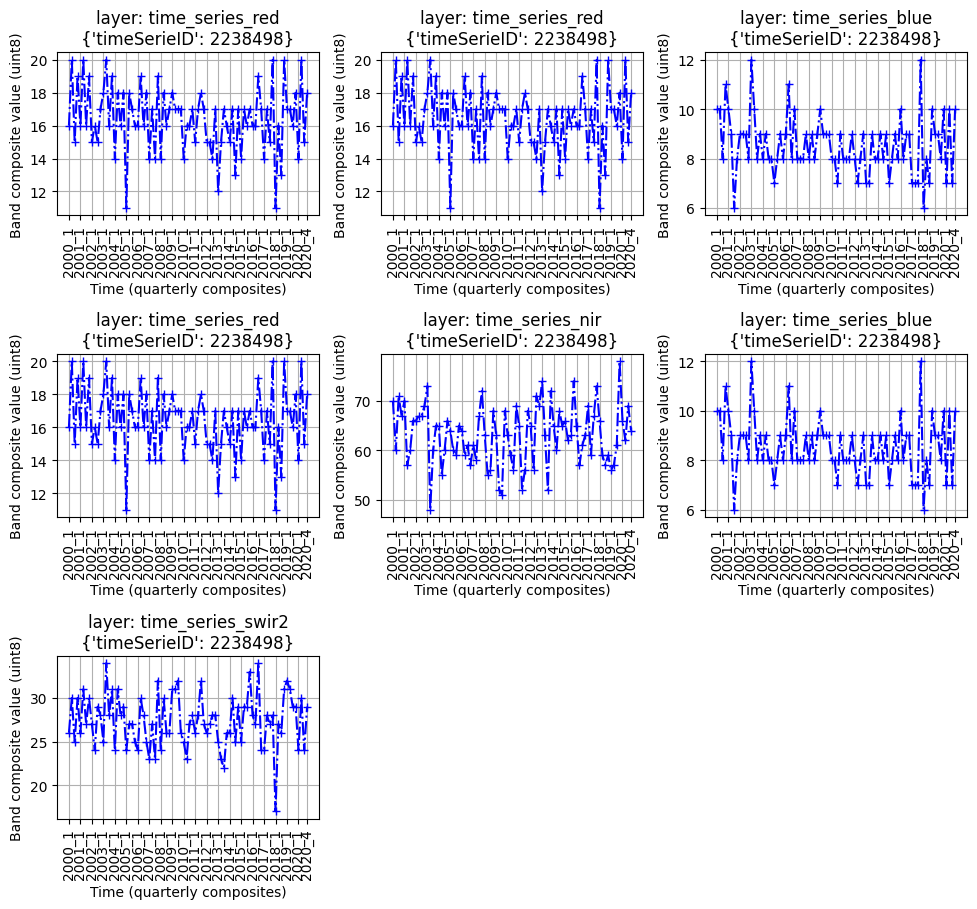

Tensor type: <class 'torch.Tensor'>, tensor shape: torch.Size([1, 7, 84]), label: 3704


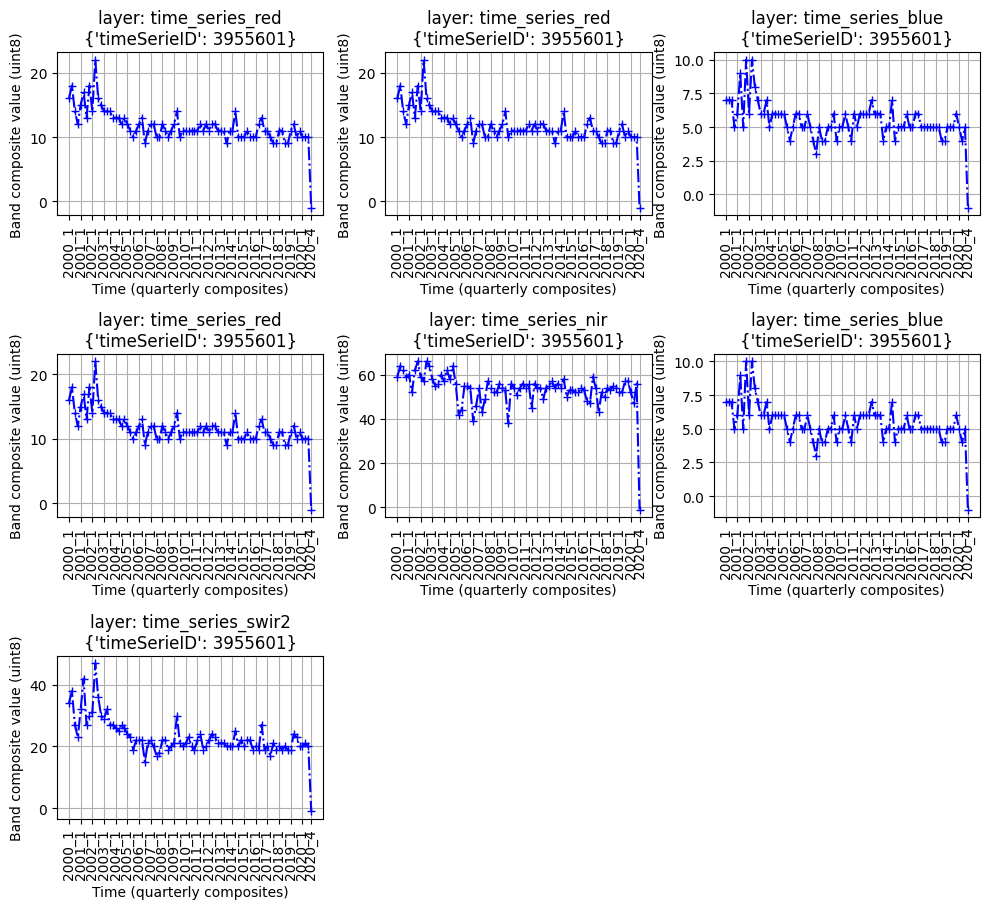

Tensor type: <class 'torch.Tensor'>, tensor shape: torch.Size([1, 7, 84]), label: 7826


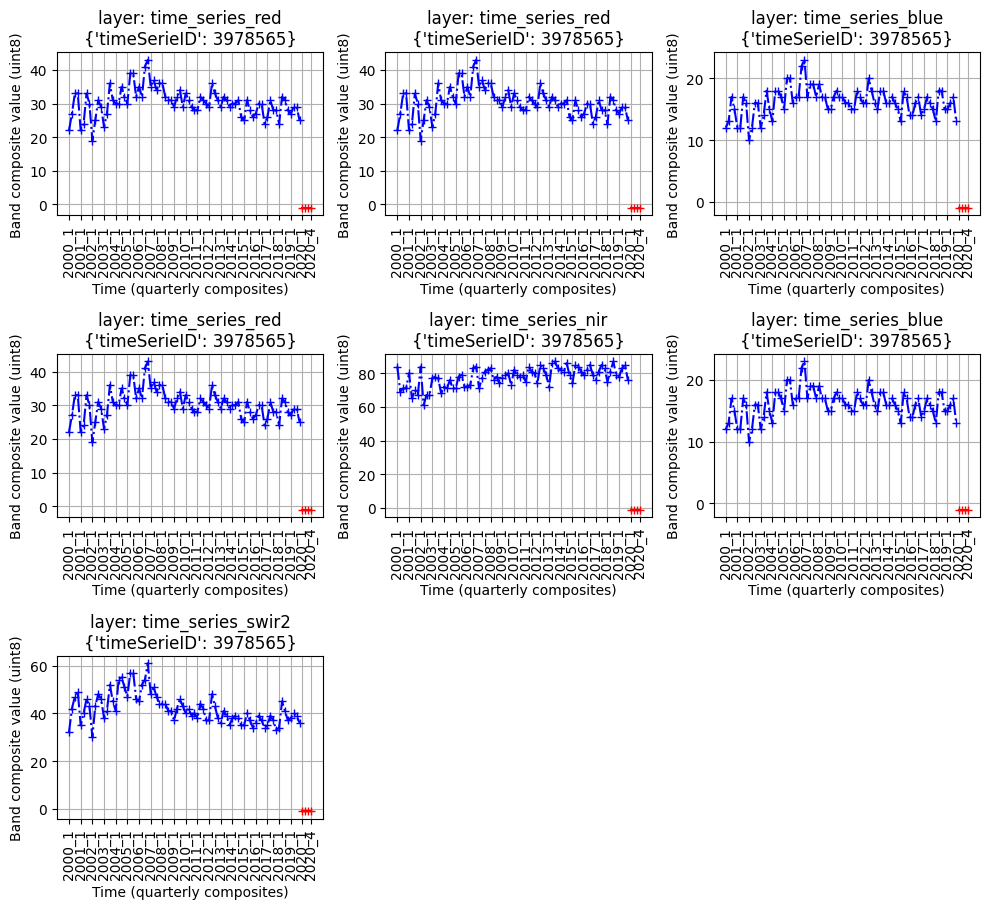

Tensor type: <class 'torch.Tensor'>, tensor shape: torch.Size([1, 7, 84]), label: 4143


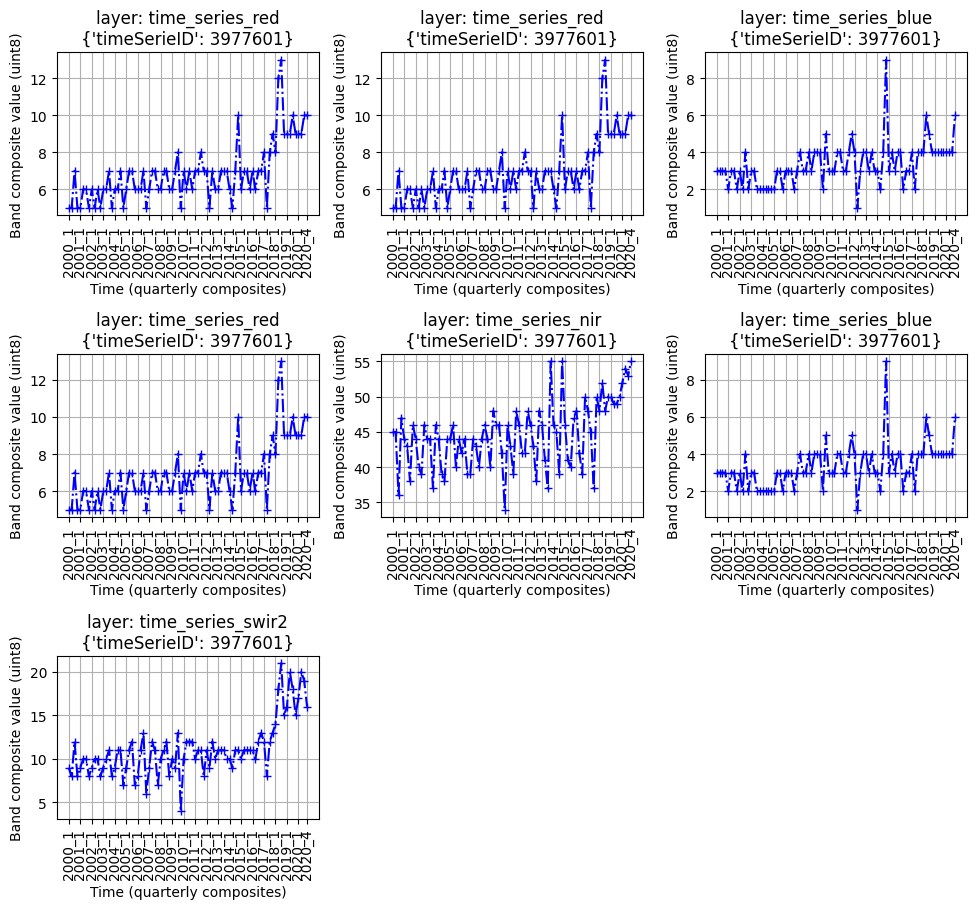

Tensor type: <class 'torch.Tensor'>, tensor shape: torch.Size([1, 7, 84]), label: 3384


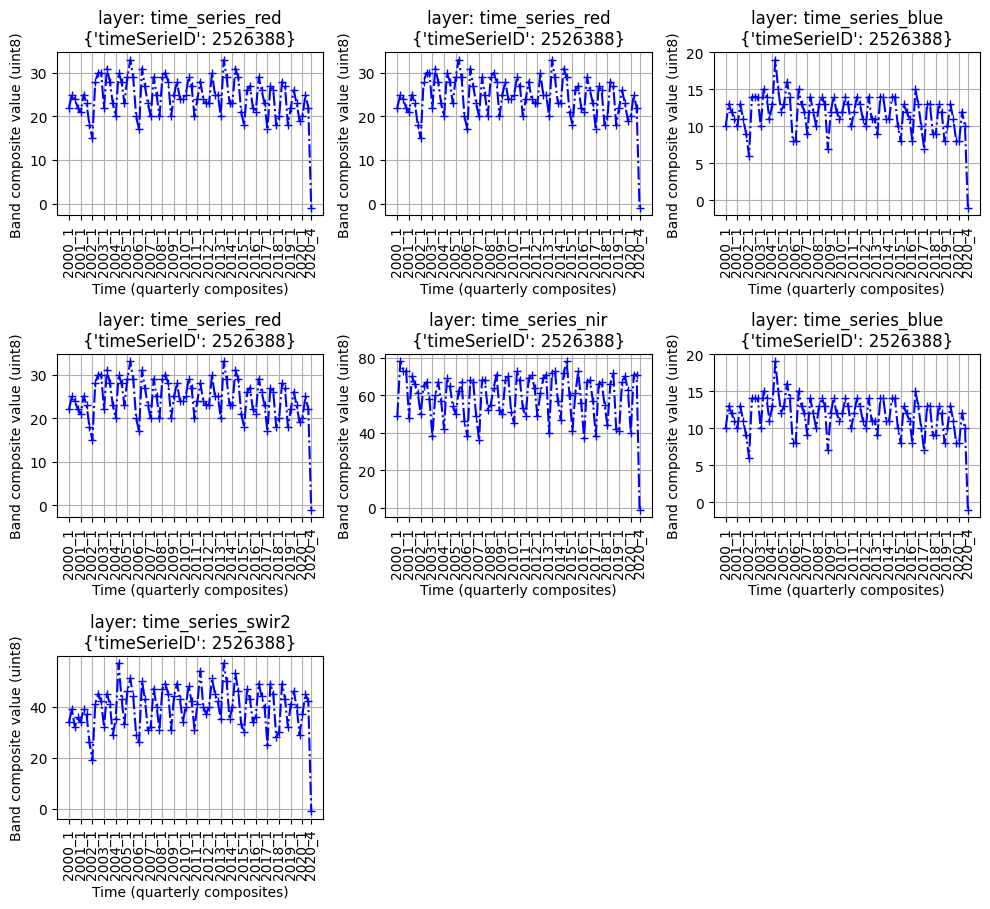

In [4]:
import random

# print random tensors from dataset
ids = [random.randint(0, len(dataset)-1) for i in range(5)]
for id in ids:
    tensor = dataset[id][0]
    label = dataset[id][1]
    print('Tensor type: {}, tensor shape: {}, label: {}'.format(type(tensor), tensor.shape, label))
    dataset.plot_ts(id)

## Torch dataloader

The ``TimeSeriesDataset`` can be then wrapped in a torch dataloader:

In [5]:
import torch

train_loader = torch.utils.data.DataLoader(dataset, shuffle=True, batch_size=64,  num_workers=8)

first_batch_tensor, first_batch_labels = next(iter(train_loader))
print(first_batch_tensor)
print(first_batch_tensor.shape)

tensor([[[[ 8.,  8.,  7.,  ..., -1., -1., -1.],
          [ 8.,  8.,  7.,  ..., -1., -1., -1.],
          [ 4.,  4.,  4.,  ..., -1., -1., -1.],
          ...,
          [48., 52., 57.,  ..., -1., -1., -1.],
          [ 4.,  4.,  4.,  ..., -1., -1., -1.],
          [14., 15., 12.,  ..., -1., -1., -1.]]],


        [[[14., 12., 10.,  ..., -1., -1., -1.],
          [14., 12., 10.,  ..., -1., -1., -1.],
          [ 6.,  6.,  5.,  ..., -1., -1., -1.],
          ...,
          [80., 92., 92.,  ..., -1., -1., -1.],
          [ 6.,  6.,  5.,  ..., -1., -1., -1.],
          [27., 25., 24.,  ..., -1., -1., -1.]]],


        [[[16., 16., 23.,  ..., -1., -1., -1.],
          [16., 16., 23.,  ..., -1., -1., -1.],
          [ 8.,  9., 11.,  ..., -1., -1., -1.],
          ...,
          [63., 78., 62.,  ..., -1., -1., -1.],
          [ 8.,  9., 11.,  ..., -1., -1., -1.],
          [29., 29., 39.,  ..., -1., -1., -1.]]],


        ...,


        [[[21., 18., 20.,  ..., 23., 24., -1.],
          [21., 